## My Neural Network

In [14]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

## Treat input and output

In [15]:
def to_1_hot_encoding(output):
    one_hot = [0] * 10
    one_hot[int(output)] = 1
    
    return one_hot

## Datasets

In [17]:
raw_data = np.loadtxt("poker-hand-training-true.data", delimiter=",")

np.random.seed(10)
np.random.shuffle(raw_data)
ratio = 85 * raw_data.shape[0] // 100
training, test = raw_data[:ratio, :], raw_data[ratio:, :]

training_input, training_output = training[:, :-1], training[:, -1]
test_input, test_output = test[:, :-1], test[:, -1]

training_output_hot = np.array(list(map(to_1_hot_encoding, training_output)))
test_output_hot = np.array(list(map(to_1_hot_encoding, test_output)))

## Activation functions

In [103]:
# function, derivate
sigm = lambda x : 1 / (1 + np.exp(-x))

sigmoid = (
    lambda x : sigm(x),
    lambda x : sigm(x) * (1 - sigm(x))
)

ReLU = (
    lambda x : x * (x > 0),
    lambda x : 1 * (x > 0)
)

def Softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

softmax = (
    lambda x : Softmax(x),
    lambda x : 1
)

### Cost function

In [104]:
# function, derivate
mean_square_error = (
    lambda prediction, real : np.mean((prediction - real) ** 2),
    lambda prediction, real : (prediction - real)
)

def bin_cross_entropy(predictions, targets):
    return -np.mean(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))

cross_entropy = (
    lambda predictions, targets : bin_cross_entropy(predictions, targets),
    lambda predictions, targets : predictions - targets
)

## Neural Network Layer class

In [105]:
class NeuralLayer:
    def __init__(self, num_connections_entering, num_neurons, activation_fn):
        self.activation_fn = activation_fn
        
        # create from -1 to 1
        self.bias = np.random.rand(1, num_neurons) + 0.3
        self.weights = np.random.rand(num_connections_entering, num_neurons) + 0.3
        
        self.num_connections_entering = num_connections_entering
        self.num_neurons = num_neurons

# Neuronal Network

In [106]:
def create_neural_network():
    neuralNetwork = [
        NeuralLayer(num_connections_entering=10, num_neurons=25, activation_fn=sigmoid),
        NeuralLayer(num_connections_entering=25, num_neurons=12, activation_fn=sigmoid),
        NeuralLayer(num_connections_entering=12, num_neurons=10, activation_fn=softmax),
    ]
    
    return neuralNetwork
    
Poker = create_neural_network()

def print_neural_network(neuralNetwork):
    list_indexes = list(range(neuralNetwork[0].num_connections_entering))
    inputs_names = list(map(lambda i: f"input {i + 1}", list_indexes))
    
    print(inputs_names, end="\n\n")
    
    for i, layer in enumerate(neuralNetwork):
        print(f"layer {i}: {layer.bias.shape[1]} neurons")
        print("weights")
        print(layer.weights, end="\n\n")
        print("bias")
        print(layer.bias, end="\n\n")
        
print_neural_network(Poker)

['input 1', 'input 2', 'input 3', 'input 4', 'input 5', 'input 6', 'input 7', 'input 8', 'input 9', 'input 10']

layer 0: 25 neurons
weights
[[0.54336375 0.46875584 0.7865757  0.8815541  0.51624429 0.58790144
  0.92901155 0.76245315 1.20060684 0.89429597 0.99438803 1.07590489
  0.56996126 0.53724136 1.23569474 0.5764299  0.42213079 0.96176985
  0.6095652  1.25014695 0.43445777 1.19827807 1.13263188 1.07341269
  0.9563883 ]
 [1.29003544 0.61709446 0.54436209 0.84137424 1.06089612 0.31303095
  0.61151769 0.32616569 0.87974121 0.99887227 0.94010581 1.20932414
  0.43257951 0.78533827 1.08185984 0.37911388 1.2345543  0.44839627
  0.6222493  0.49965563 0.63257329 0.41434819 0.50161724 0.7729498
  0.74812477]
 [0.51802576 0.74984941 0.48702921 0.56799335 0.46317763 0.37500705
  0.36544858 0.83046251 1.19512303 0.91617238 0.95261964 0.56453573
  1.19470029 0.97068327 1.11536618 0.50170363 0.73270594 0.6930699
  1.19814876 1.13867977 0.37537728 0.69752245 0.84857392 0.44600426
  0.96781725]
 [0

In [107]:
def foward_pass(neural_network, inputs, cost_function, print_it=True):
    input_to_layer = inputs
    steps = [(None, inputs)]
    
    for _, layer in enumerate(neural_network):
        ponderate_sum = input_to_layer @ layer.weights + layer.bias
        input_to_layer = activation = layer.activation_fn[0](ponderate_sum)
        if _ == 2:
            print(ponderate_sum)
            print(activation)
        steps.append((ponderate_sum, activation))
    
    if print_it:
        prediction = np.hstack((inputs, input_to_layer))
        print("Current behavior")
        print(prediction, end="\n\n")
    
    return steps

steps = foward_pass(Poker, training_input[0:1, :], mean_square_error)

[[10.37338039 10.73453923  9.83583101 11.32082806 10.5735486  11.47507227
   8.66325467 10.36909839  8.47057251 11.45657839]]
[[0.07087684 0.10170766 0.0414047  0.18279978 0.08658374 0.21328636
  0.01281758 0.070574   0.01057123 0.20937811]]
Current behavior
[[1.00000000e+00 7.00000000e+00 3.00000000e+00 9.00000000e+00
  3.00000000e+00 6.00000000e+00 2.00000000e+00 1.20000000e+01
  1.00000000e+00 1.20000000e+01 7.08768439e-02 1.01707660e-01
  4.14047000e-02 1.82799779e-01 8.65837355e-02 2.13286357e-01
  1.28175850e-02 7.05739984e-02 1.05712272e-02 2.09378114e-01]]



In [102]:
print(training_input[0])
x = steps[-1][0]
print(x)
x2 = softmax[0](x[0])
print(x2)

def Softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

print(Softmax(x))


[ 1.  7.  3.  9.  3.  6.  2. 12.  1. 12.]
[[ 9.97048252  9.36059513 11.38878198 11.2289308   8.41810432 10.96190666
   9.4512626  11.15949665 12.10418969  8.91784472]]
[0.04036452 0.02193456 0.16670913 0.14208129 0.00854694 0.10878519
 0.02401626 0.1325507  0.34092355 0.01408786]
[[0.04036452 0.02193456 0.16670913 0.14208129 0.00854694 0.10878519
  0.02401626 0.1325507  0.34092355 0.01408786]]


In [40]:
def backpropagation(neural_network, inputs, outputs, cost_function, show, learning_rate = 3.2):
    steps = foward_pass(neural_network, inputs, cost_function, show)
    deltas = [None] * len(neural_network)
    
    next_layer_weights = None
    num_layers, num_inputs = len(neural_network), inputs.shape[0]

    for i in reversed(range(num_layers)):
        ponderate_sum, activation = steps[i + 1]
        _, activation_last_layer = steps[i]
        
        if i == num_layers - 1:
            cost_activation = cost_function[1](activation, outputs)
        else:
            cost_activation = deltas[i + 1] @ next_layer_weights.T / num_inputs
            
        activation_ponderate = neural_network[i].activation_fn[1](ponderate_sum)
        deltas[i] = delta = cost_activation * activation_ponderate
        
        gradient_weights = (activation_last_layer.T @ delta) / num_inputs
        gradient_bias = np.mean(delta, axis=0, keepdims=True)
        
        next_layer_weights = neural_network[i].weights
        
        neural_network[i].bias -= learning_rate * gradient_bias
        neural_network[i].weights -= learning_rate * gradient_weights
        
    error = cost_function[0](steps[-1][1], outputs)
    return error

In [44]:
def show_step(neural_network, input_dataset, output_dataset, cost_function, show):
    error_before = backpropagation(neural_network, input_dataset, output_dataset, cost_function, show)
    print(f"current error = {error_before}")
    
    if show: 
        steps = foward_pass(neural_network, input_dataset, cost_function, False)
        error_after = cost_function[0](steps[-1][1], output_dataset)
        
        print_neural_network(neural_network)
        
        print(f"new error = {error_after}")
        print(f"difference = {abs(error_before - error_after)}", end="\n\n")
        
    return error_before
        
x = show_step(Poker, training_input, training_output_hot, mean_square_error, True)

Current behavior
[[1.00000000e+00 7.00000000e+00 3.00000000e+00 ... 1.98996183e-11
  4.47388500e-06 1.46194913e-18]
 [4.00000000e+00 1.30000000e+01 3.00000000e+00 ... 4.00879816e-20
  3.87879034e-17 1.99081936e-22]
 [1.00000000e+00 4.00000000e+00 4.00000000e+00 ... 5.90212590e-20
  2.37081461e-14 1.36169215e-14]
 ...
 [4.00000000e+00 1.00000000e+01 2.00000000e+00 ... 5.08238006e-18
  3.55989771e-13 5.20506143e-19]
 [1.00000000e+00 1.00000000e+01 2.00000000e+00 ... 2.50492529e-18
  2.08853098e-13 1.62897033e-21]
 [2.00000000e+00 5.00000000e+00 3.00000000e+00 ... 2.36327669e-14
  2.66944932e-08 7.14266340e-13]]

current error = 0.10001808766752286
['input 1', 'input 2', 'input 3', 'input 4', 'input 5', 'input 6', 'input 7', 'input 8', 'input 9', 'input 10']

layer 0: 25 neurons
weights
[[ 0.40774834  0.03379832 -0.00588577  0.00678128  0.50104474 -0.64500203
  -0.60039441 -0.68401542  0.96417188  0.01043979 -0.11450338  0.03931537
  -0.49520493 -0.03692137 -0.09569684  0.22732769 -0.0337

/Users/soyoscarrh/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [12]:
errors = []

In [13]:
@interact_manual(times = (1, 5500))
def trainXOR(times):
    global errors
    for i in range(times):
        error = show_step(XOR, input_dataset, output_dataset, mean_square_error, False)
        errors.append(error)
        

interactive(children=(IntSlider(value=2750, description='times', max=5500, min=1), Button(description='Run Int…

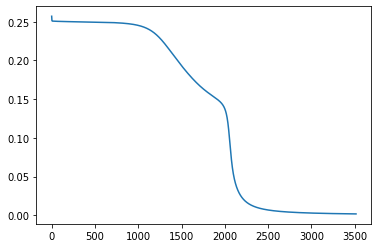

In [14]:
plt.plot(errors) 
plt.show() 